In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error

In [2]:
# 데이터 불러오기
df = pd.read_csv(r"C:\Users\tjdgu\CodingFiles\AI_Introduction\week13\AAME.csv")

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


In [3]:
# 이상치 제거 (Open이 0인 경우 제거)

df_clean = df[['Open', 'High', 'Low', 'Close']].copy()
df_clean = df_clean[df_clean['Open'] != 0]
df_clean.dropna(inplace=True)

df_clean

,Open,High,Low,Close
66,3.80,3.80,3.80,3.80
71,3.50,3.50,3.50,3.50
72,3.50,3.50,3.50,3.50
118,4.60,4.60,4.60,4.60
194,5.25,5.25,5.25,5.25
...,...,...,...,...
10093,2.29,2.29,2.08,2.28
10094,2.25,2.25,2.21,2.25
10095,2.25,2.25,2.13,2.13
10096,2.11,2.11,2.11,2.11


In [4]:
# 정규화
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_clean)

scaled_data

array([[0.25163704, 0.25163704, 0.25512104, 0.25163704],
       [0.22918615, 0.22918615, 0.23277467, 0.22918615],
       [0.22918615, 0.22918615, 0.23277467, 0.22918615],
       ...,
       [0.13564078, 0.13564078, 0.13072626, 0.12666044],
       [0.12516369, 0.12516369, 0.12923649, 0.12516369],
       [0.12516369, 0.12815716, 0.12923649, 0.12815716]])

In [5]:
# 시퀀스 생성
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :3])  # Open, High, Low
        y.append(data[i+seq_length, 3])     # Close
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(scaled_data, seq_length)

In [6]:
X

array([[[0.25163704, 0.25163704, 0.25512104],
        [0.22918615, 0.22918615, 0.23277467],
        [0.22918615, 0.22918615, 0.23277467],
        ...,
        [0.33395697, 0.33395697, 0.33705773],
        [0.33395697, 0.33395697, 0.33705773],
        [0.33021514, 0.33021514, 0.33333332]],

       [[0.22918615, 0.22918615, 0.23277467],
        [0.22918615, 0.22918615, 0.23277467],
        [0.31150607, 0.31150607, 0.31471135],
        ...,
        [0.33395697, 0.33395697, 0.33705773],
        [0.33021514, 0.33021514, 0.33333332],
        [0.34144059, 0.34144059, 0.34450651]],

       [[0.22918615, 0.22918615, 0.23277467],
        [0.31150607, 0.31150607, 0.31471135],
        [0.36014967, 0.36014967, 0.36312849],
        ...,
        [0.33021514, 0.33021514, 0.33333332],
        [0.34144059, 0.34144059, 0.34450651],
        [0.33021514, 0.33021514, 0.33333332]],

       ...,

       [[0.15434986, 0.15434986, 0.15009312],
        [0.14536951, 0.14536951, 0.13594041],
        [0.13189897, 0

In [7]:
y

array([0.34144059, 0.33021514, 0.32273152, ..., 0.12666044, 0.12516369,
       0.12815716])

In [8]:
# 훈련/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 훈련, 테스트 데이터 형태 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6812, 10, 3), (1704, 10, 3), (6812,), (1704,))

In [9]:
# RNN 모델 구성
model = Sequential([
    SimpleRNN(64, activation='tanh', input_shape=(seq_length, 3)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

model.summary()

c:\Users\tjdgu\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,417 (17.25 KB)

 Trainable params: 4,417 (17.25 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# 학습
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0021 - val_loss: 1.0376e-04
Epoch 2/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.0130e-04 - val_loss: 9.8655e-05
Epoch 3/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9451e-04 - val_loss: 1.1214e-04
Epoch 4/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6929e-04 - val_loss: 1.1634e-04
Epoch 5/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7581e-04 - val_loss: 6.9826e-05
Epoch 6/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7707e-04 - val_loss: 6.6682e-05
Epoch 7/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6085e-04 - val_loss: 6.8942e-05
Epoch 8/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6358e-04 - val_loss: 1.5610e-04
Epoch 9/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7460e-04 - val_loss: 6.7112e-05
Epoch 10/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4462e-04 - val_loss: 2.2703e-04
Epoch 11/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.

In [11]:
# 예측
y_pred = model.predict(X_test)

# MSE 계산 및 출력
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE (Normalized): {mse:.6f}")

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test MSE (Normalized): 0.000068


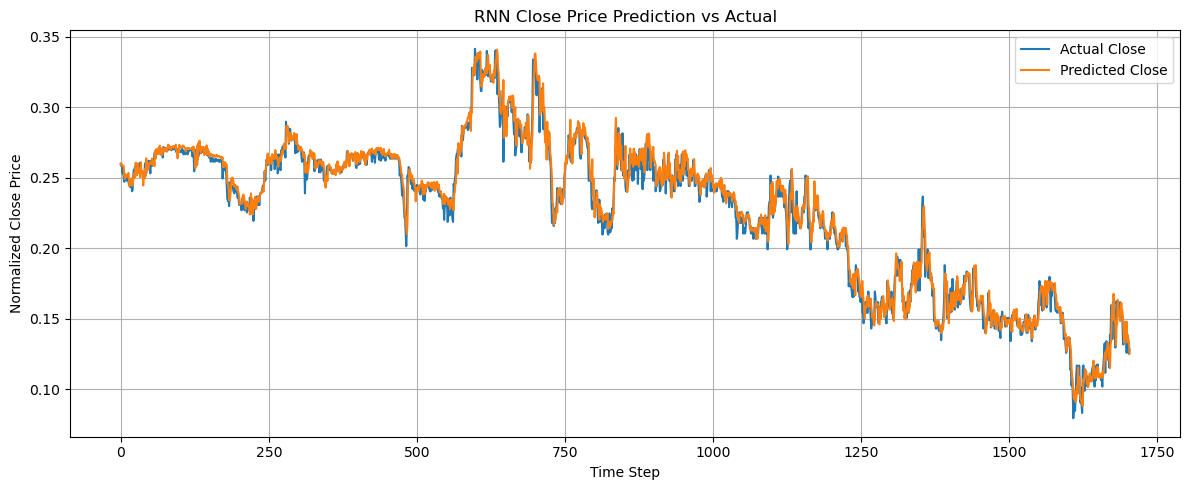

In [12]:
# 시각화
plt.figure(figsize=(12, 5))
plt.plot(y_test, label='Actual Close')
plt.plot(y_pred, label='Predicted Close')
plt.title('RNN Close Price Prediction vs Actual')
plt.xlabel('Time Step')
plt.ylabel('Normalized Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
